In [1]:
import pandas as pd 
import arch.data.wti
import matplotlib.pyplot as plt 
from arch import arch_model
from collections import OrderedDict

plt.style.use('bmh')

In [2]:
crude = arch.data.wti.load()
crude_ret = 100 * crude.dropna().pct_change(1).dropna()
crude_ret

,DCOILWTICO
Date,
1986-01-03,1.721440
1986-01-06,2.038462
1986-01-07,-2.563136
1986-01-08,0.077369
1986-01-09,0.618477
...,...
2018-12-26,1.454385
2018-12-27,-3.388358
2018-12-28,1.506295


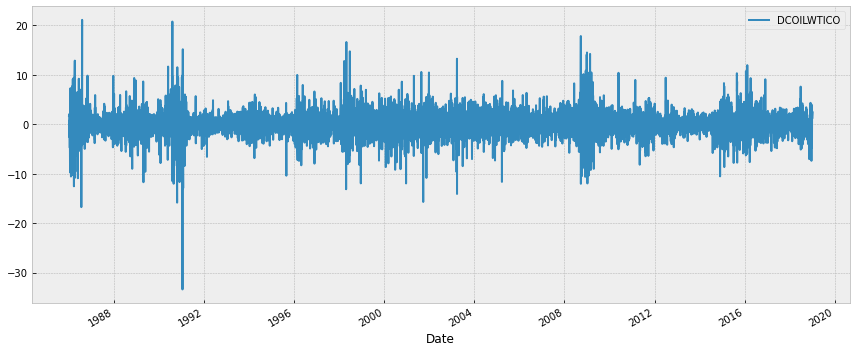

In [3]:
crude_ret.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

In [4]:
# compare distributions
# 1. Normal
# 2. Standard Student’s T  
# 3. Standardized Skew Student’s T 

res_normal = arch_model(crude_ret, dist='normal').fit(disp='off')
res_t = arch_model(crude_ret, dist='t').fit(disp='off')
res_skewt = arch_model(crude_ret, dist='skewt').fit(disp='off')

In [5]:
loglikelihood = OrderedDict((
    ('normal', res_normal.loglikelihood),
    ('t', res_t.loglikelihood),
    ('skewt', res_skewt.loglikelihood)))

In [6]:
# T and the Skew T are close
# --> returns are not heavily skewed.

pd.Series(loglikelihood)

normal   -18165.858870
t        -17919.643916
skewt    -17916.669052
dtype: float64

In [7]:
params = OrderedDict((
    ('normal', res_normal.params),
    ('t', res_t.params),
    ('skewt', res_skewt.params)
))

In [8]:
pd.DataFrame(params)

,normal,t,skewt
alpha[1],0.085627,0.064980,0.064889
beta[1],0.909098,0.927950,0.928215
eta,NaN,NaN,6.186541
lambda,NaN,NaN,-0.036986
mu,0.046682,0.056438,0.040928
nu,NaN,6.178596,NaN
omega,0.055806,0.048516,0.047683


In [9]:
# Standardized residuals --> residuals / conditional volatility
std_resid = res_normal.resid / res_normal.conditional_volatility

# Unit variance residuals --> residuals / std(residuals)
unit_var_resid = res_normal.resid / res_normal.resid.std()

In [10]:
resids = pd.concat([std_resid, unit_var_resid], axis=1)
resids.columns = ['Std Resids', 'Unit Var Resids']
resids

,Std Resids,Unit Var Resids
Date,,
1986-01-03,0.400470,0.671788
1986-01-06,0.494935,0.798954
1986-01-07,-0.671206,-1.046865
1986-01-08,0.008092,0.012310
1986-01-09,0.157790,0.229362
...,...,...
2018-12-26,0.413267,0.564666
2018-12-27,-1.046532,-1.377883
2018-12-28,0.442910,0.585488


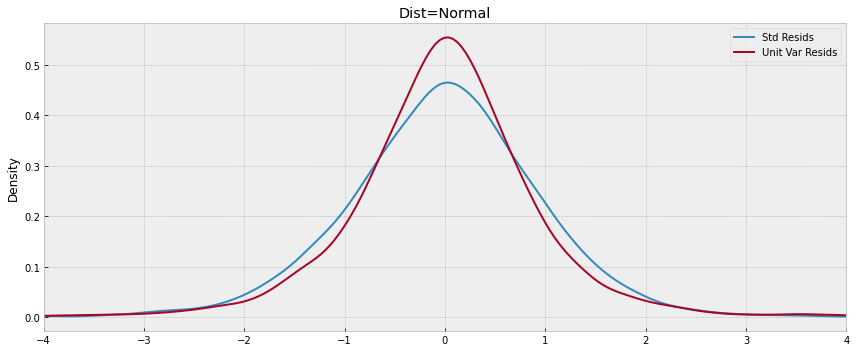

In [11]:
resids.plot(kind='kde', figsize=(12,5), xlim=[-4,4], title='Dist=Normal')
plt.tight_layout()
plt.show()

In [12]:
std_resid_normal = res_normal.resid / res_normal.conditional_volatility
std_resid_t = res_t.resid / res_t.conditional_volatility
std_resid_skewt = res_skewt.resid / res_skewt.conditional_volatility

In [13]:
std_resids_df = pd.concat([std_resid_normal, std_resid_t, std_resid_skewt], axis=1)
std_resids_df.columns = ["Normal", "T", 'Skew T']
std_resids_df

,Normal,T,Skew T
Date,,,
1986-01-03,0.400470,0.398579,0.402266
1986-01-06,0.494935,0.489104,0.492797
1986-01-07,-0.671206,-0.664468,-0.660206
1986-01-08,0.008092,0.005419,0.009432
1986-01-09,0.157790,0.150801,0.154884
...,...,...,...
2018-12-26,0.413267,0.432613,0.438025
2018-12-27,-1.046532,-1.096761,-1.093069
2018-12-28,0.442910,0.459083,0.464626


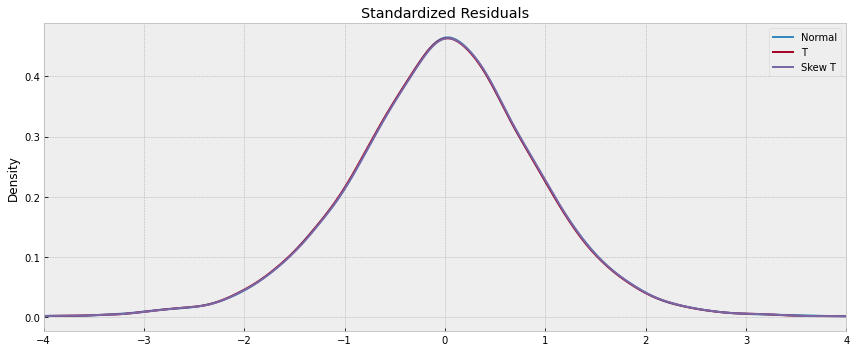

In [14]:
std_resids_df.plot(kind='kde', figsize=(12,5), xlim=[-4,4], title='Standardized Residuals')
plt.tight_layout()
plt.show()